In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv("weather-random.csv")

In [4]:
weather.head(5)

,Random,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverters)
0,0.831284,5/30/2017,0.31,9.96,19.77,7.51,45.51,10.91,27.20,29.99,35074.0,NaN
1,0.605385,7/26/2017,0.27,9.41,24.57,21.81,83.62,5.09,29.26,30.05,28983.0,NaN
2,0.622957,6/5/2016,0.35,10.00,20.79,15.21,68.98,11.61,28.96,29.75,28213.0,NaN
3,0.828596,1/19/2017,0.70,3.63,4.34,4.01,95.85,8.08,29.09,29.88,3127.0,NaN
4,0.416856,5/5/2017,0.12,10.00,10.78,5.44,70.45,15.34,28.98,29.77,39832.0,NaN


In [5]:
weather.drop(["(Inverters)","Random","Date"], axis = 1, inplace = True) 

In [6]:
weather.shape

(637, 9)

In [7]:
weather.dtypes

Cloud coverage       float64
Visibility           float64
Temperature          float64
Dew point            float64
Relative humidity    float64
Wind speed           float64
Station pressure     float64
Altimeter            float64
Solar energy         float64
dtype: object

In [8]:
weather.head(7)

,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,0.31,9.96,19.77,7.51,45.51,10.91,27.20,29.99,35074.0
1,0.27,9.41,24.57,21.81,83.62,5.09,29.26,30.05,28983.0
2,0.35,10.00,20.79,15.21,68.98,11.61,28.96,29.75,28213.0
3,0.70,3.63,4.34,4.01,95.85,8.08,29.09,29.88,3127.0
4,0.12,10.00,10.78,5.44,70.45,15.34,28.98,29.77,39832.0
5,0.49,9.98,22.87,17.66,69.39,2.89,29.10,29.89,29671.0
6,0.16,10.00,21.68,16.35,67.06,6.52,29.23,30.03,30312.0


In [11]:
#Getting the variables to an array.
CloudCoverage = weather['Cloud coverage'].values
Visibility = weather['Visibility'].values
Temperature = weather['Temperature'].values
DewPoint= weather['Dew point'].values
RelativeHumidity= weather['Relative humidity'].values
WindSpeed= weather['Wind speed'].values
StationPressure= weather['Station pressure'].values
Altimeter= weather['Altimeter'].values
SolarEnergy= weather['Solar energy'].values


In [10]:
weather.columns

Index(['Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
       'Solar energy'],
      dtype='object')

In [37]:
X = np.array([CloudCoverage,Visibility,Temperature,DewPoint,RelativeHumidity,WindSpeed,StationPressure,Altimeter])
    
Y = np.array([SolarEnergy])

In [38]:
# Model Intialization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()

In [40]:
X.shape

(8, 637)

In [41]:
Y.shape

(1, 637)

In [42]:
X = X.transpose()

In [43]:
X.shape

(637, 8)

In [44]:
Y = Y.transpose()

In [49]:
# train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [50]:
# Data Fitting
reg = reg.fit(X_train,y_train)

In [51]:
# Y Prediction
Y_pred = reg.predict(X_test)

In [61]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
r2 = reg.score(X, Y)

In [59]:
print(rmse)
print(r2)

6925.291264420367
0.6271321864990275


In [62]:
from sklearn.externals import joblib

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
joblib.dump(reg, 'reg.pkl')

['reg.pkl']

In [71]:
X_new= weather.loc[:, weather.columns != 'Solar energy']

In [72]:
X_new.columns

Index(['Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter'],
      dtype='object')

In [73]:
# Saving the data columns from training
model_columns = list(X_new.columns)
joblib.dump(model_columns, 'model_reg.pkl')
print("Models columns dumped!")

Models columns dumped!


In [83]:
# The coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-1.62936318e+04 -7.82481725e+00  8.35472760e+02 -5.86366831e+02
  -1.34934314e+02 -3.14690229e+01  1.11260074e+03  9.53721728e+02]]


In [87]:
from sklearn import decomposition

In [88]:
pca = decomposition.PCA()
fa = decomposition.FactorAnalysis()

In [89]:
train, test = train_test_split(X,test_size = 0.3)


In [90]:
train_reduced = pca.fit_transform(train)
test_reduced = pca.transform(test)
pca.n_components_

8

In [91]:
#for classification
from sklearn.ensemble import AdaBoostClassifier
#for regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
#Here we have used decision tree as a base estimator; Any ML learner can be used as base #estimator if it accepts sample weight
clf.fit(X_train,y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [92]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
rmse_val = [] #to store rmse values for different k
for K in range(8):
    K = K+1
    kmodel = neighbors.KNeighborsRegressor(n_neighbors = K)

    kmodel.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 23715.522360158247
RMSE value for k=  2 is: 23715.522360158247
RMSE value for k=  3 is: 23715.522360158247
RMSE value for k=  4 is: 23715.522360158247
RMSE value for k=  5 is: 23715.522360158247
RMSE value for k=  6 is: 23715.522360158247
RMSE value for k=  7 is: 23715.522360158247
RMSE value for k=  8 is: 23715.522360158247


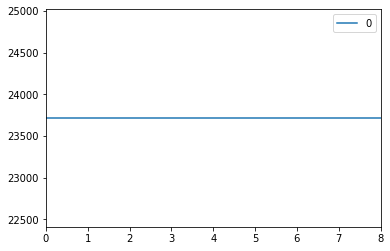

In [106]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()